<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Rozdział-4.-Tworzenie-dobrych-zbiorów-uczących-—-wstępne-przetwarzanie-danych" data-toc-modified-id="Rozdział-4.-Tworzenie-dobrych-zbiorów-uczących-—-wstępne-przetwarzanie-danych-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Rozdział 4. Tworzenie dobrych zbiorów uczących — wstępne przetwarzanie danych</a></span><ul class="toc-item"><li><span><a href="#Kwestia-brakujących-danych" data-toc-modified-id="Kwestia-brakujących-danych-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Kwestia brakujących danych</a></span></li><li><span><a href="#Usuwanie-próbek-lub-cech-niezawierających-wartości" data-toc-modified-id="Usuwanie-próbek-lub-cech-niezawierających-wartości-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Usuwanie próbek lub cech niezawierających wartości</a></span></li><li><span><a href="#Wstawianie-brakujących-danych" data-toc-modified-id="Wstawianie-brakujących-danych-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Wstawianie brakujących danych</a></span></li><li><span><a href="#Estymatory-interfejsu-scikit-learn" data-toc-modified-id="Estymatory-interfejsu-scikit-learn-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Estymatory interfejsu scikit-learn</a></span></li><li><span><a href="#Przetwarzanie-danych-kategoryzująch" data-toc-modified-id="Przetwarzanie-danych-kategoryzująch-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Przetwarzanie danych kategoryzująch</a></span></li><li><span><a href="#Mapowanie-cech-porządkowych" data-toc-modified-id="Mapowanie-cech-porządkowych-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Mapowanie cech porządkowych</a></span></li><li><span><a href="#Kodowanie-etykiet-klas" data-toc-modified-id="Kodowanie-etykiet-klas-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Kodowanie etykiet klas</a></span></li><li><span><a href="#Kodowanie-&quot;gorącojedynkowe&quot;-cech-nominalnych-z-użyciem-wektorów-własnych" data-toc-modified-id="Kodowanie-&quot;gorącojedynkowe&quot;-cech-nominalnych-z-użyciem-wektorów-własnych-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Kodowanie "gorącojedynkowe" cech nominalnych z użyciem wektorów własnych</a></span></li><li><span><a href="#Rozdzielenie-zestawu-danych-na-uczące-i-testowe" data-toc-modified-id="Rozdzielenie-zestawu-danych-na-uczące-i-testowe-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Rozdzielenie zestawu danych na uczące i testowe</a></span></li><li><span><a href="#Skalowanie-cech" data-toc-modified-id="Skalowanie-cech-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>Skalowanie cech</a></span></li><li><span><a href="#Dobór-odpowiednich-cech" data-toc-modified-id="Dobór-odpowiednich-cech-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span>Dobór odpowiednich cech</a></span><ul class="toc-item"><li><span><a href="#Regularyzacja-L1" data-toc-modified-id="Regularyzacja-L1-4.11.1"><span class="toc-item-num">4.11.1&nbsp;&nbsp;</span>Regularyzacja L1</a></span></li></ul></li><li><span><a href="#Algorytm-sekwencyjnego-wyboru-cech" data-toc-modified-id="Algorytm-sekwencyjnego-wyboru-cech-4.12"><span class="toc-item-num">4.12&nbsp;&nbsp;</span>Algorytm sekwencyjnego wyboru cech</a></span></li><li><span><a href="#Ocenianie-istotności-za-pomocą-algorytmu-losowego-lasu" data-toc-modified-id="Ocenianie-istotności-za-pomocą-algorytmu-losowego-lasu-4.13"><span class="toc-item-num">4.13&nbsp;&nbsp;</span>Ocenianie istotności za pomocą algorytmu losowego lasu</a></span></li></ul></li></ul></div>

# Rozdział 4. Tworzenie dobrych zbiorów uczących — wstępne przetwarzanie danych

In [1]:
from IPython.display import Image

## Kwestia brakujących danych 

In [2]:
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df= pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


Tu jest wszystko jasne, tworzymy ciąg znaków, potem wczytujemy dane w formacie CSV do obiektu DataFrame. StringIO powoduje jakbyśmy wczytywali dane z zewnętrznego pliku. Poniżej sprawdzamy ile mamy danych nieliczbowych

In [3]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [4]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

## Usuwanie próbek lub cech niezawierających wartości

Usuwanie całych cech (kolumn) lub wierszy (próbek)

In [5]:
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [6]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


Inne przypadki zastosowań metody dropna

In [7]:
#usuwa jedynie wierwsze z wszystkimi kolumnami NaN
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [8]:
#wiersze z mniej niż 4 próbkami 
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [9]:
#usuwa jedynie wiersze z wartością NaN w danych kolumnach
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


## Wstawianie brakujących danych 

Wstawianie danych za pomocą interpolacji brakujących próbek, np. z pomocą imputacji z użyciem średniej

In [10]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN',strategy='mean',axis=0)
#axis 0 wyliczana średnia po kolumnach, 1 po wierszach
imr = imr.fit(df)
imputed_data= imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

## Estymatory interfejsu scikit-learn

Klasy transformujące:<br>
Metoda fit służy do dopasowania parametrów  poprzez dane uczące 
<br>
transform wykorzystuje te parametry do modyfikacji danych

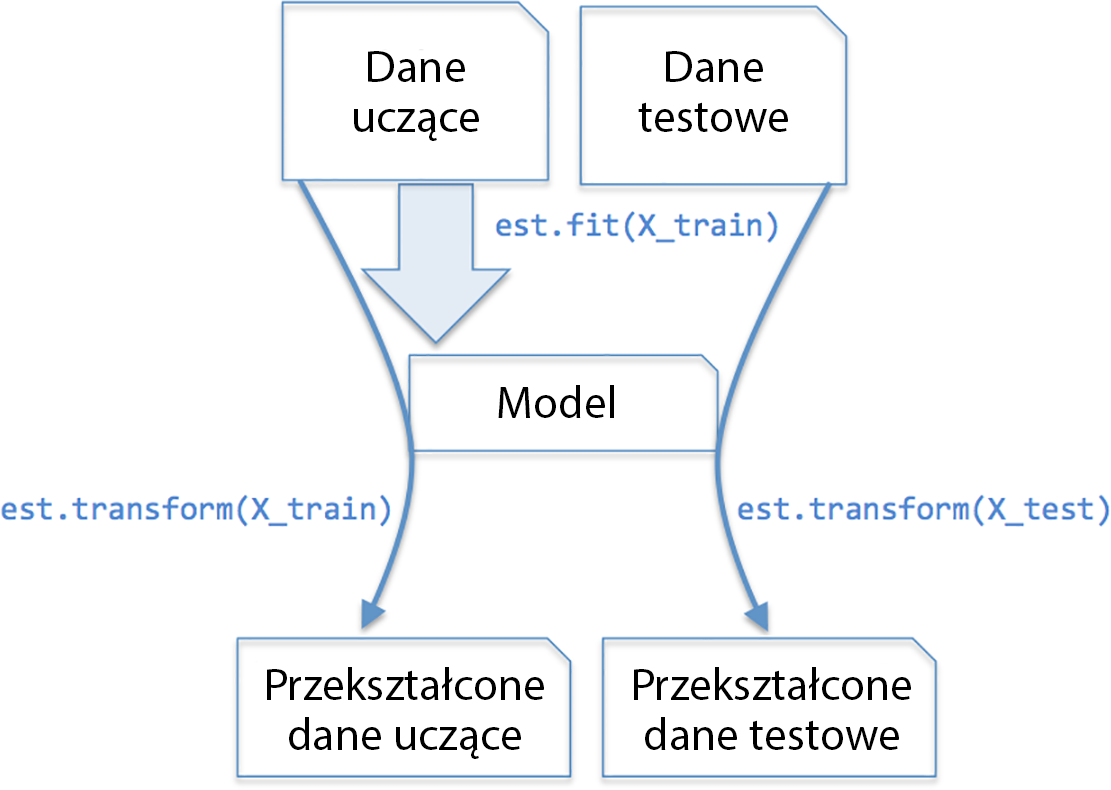

In [11]:
Image(filename='./rysunki/rozdzial 4/04_04.png',width=400)

Dla estymatorów scikit-learn mamy trochę inną sytuację: 
<br>
ich interfejs API przypomina klasę tranformującą
<br>
używają metody predict, ale możemy korzystać  z metody transform
<br>
Mechanim działania estymatora pokazano na rysunku poniżej:

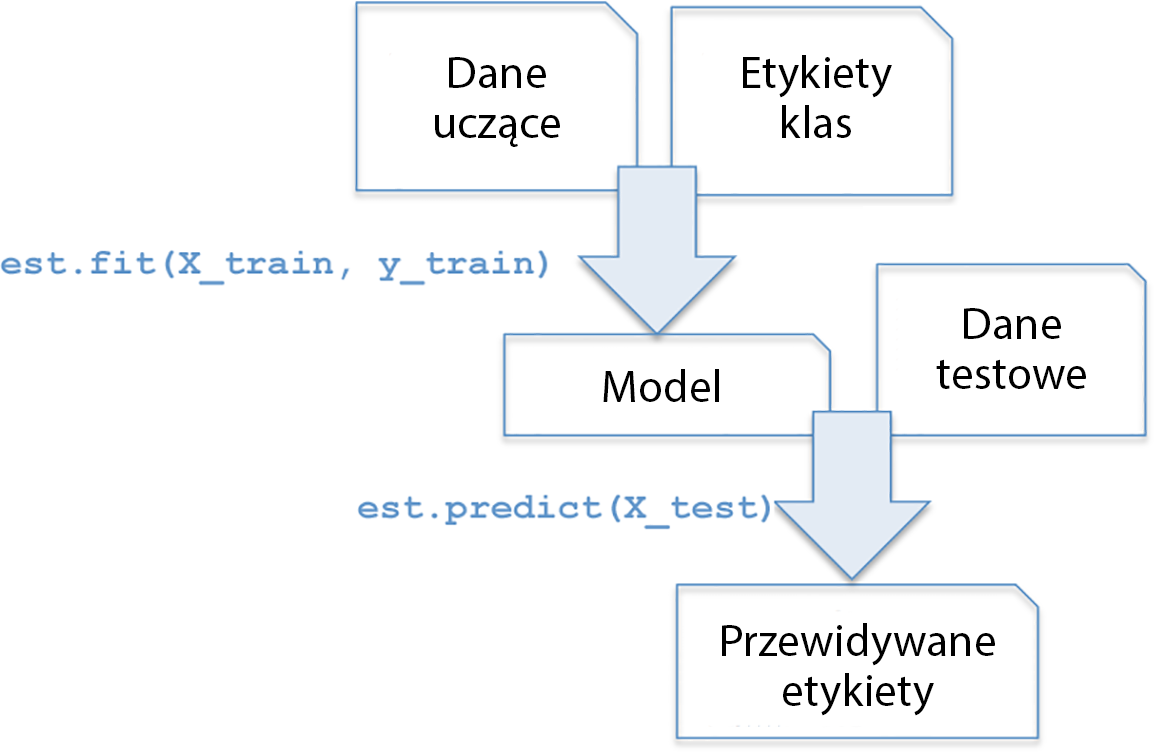

In [12]:
Image(filename='./rysunki/rozdzial 4/04_05.png',width=400)

## Przetwarzanie danych kategoryzująch 

Dane kategoryzujące dzielimy na cechy nominalne i porządkowe. <br>
Cechy porządkowe to takie wartości kategoryzacjne, które możemy wykorzystać do sortowania np. rozmiar koszulki<br>
Cechy nominalne nie definiuja kolejności próbek np. kolor koszulek

In [13]:
import pandas as pd
df = pd.DataFrame([['Zielony', 'M', 10.1,
                    'klasa1'], ['Czerwony', 'L', 13.5, 'klasa2'],
                   ['Niebieski', 'XL', 15.3, 'klasa1']])

df.columns = ['Kolor', 'Rozmiar', 'Cena', 'Etykieta klas']
df

,Kolor,Rozmiar,Cena,Etykieta klas
0,Zielony,M,10.1,klasa1
1,Czerwony,L,13.5,klasa2
2,Niebieski,XL,15.3,klasa1


## Mapowanie cech porządkowych 

In [14]:
import pandas as pd
df = pd.DataFrame([['Zielony', 'M', 10.1,
                    'klasa1'], ['Czerwony', 'L', 13.5, 'klasa2'],
                   ['Niebieski', 'XL', 15.3, 'klasa1']])

df.columns = ['Kolor', 'Rozmiar', 'Cena', 'Etykieta klas']
size_mapping = {'XL': 3, 'L': 2, 'M': 1}
df.Rozmiar=df.Rozmiar.map(size_mapping)
df

,Kolor,Rozmiar,Cena,Etykieta klas
0,Zielony,1,10.1,klasa1
1,Czerwony,2,13.5,klasa2
2,Niebieski,3,15.3,klasa1


In [15]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df.Rozmiar.map(inv_size_mapping)

0     M
1     L
2    XL
Name: Rozmiar, dtype: object

## Kodowanie etykiet klas 

kodowanie etykiet klas bez wykorzystania biblioteki scikit, nazwy etykiet klas zamieniamy na liczby.

In [16]:
import numpy as np
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['Etykieta klas']))}
class_mapping
df['Etykieta klas']=df['Etykieta klas'].map(class_mapping)
df

,Kolor,Rozmiar,Cena,Etykieta klas
0,Zielony,1,10.1,0
1,Czerwony,2,13.5,1
2,Niebieski,3,15.3,0


odwrócenie pary klucz:

In [17]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['Etykieta klas'] = df['Etykieta klas'].map(inv_class_mapping)
df

,Kolor,Rozmiar,Cena,Etykieta klas
0,Zielony,1,10.1,klasa1
1,Czerwony,2,13.5,klasa2
2,Niebieski,3,15.3,klasa1


In [18]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y= class_le.fit_transform(df['Etykieta klas'].values)
class_le.inverse_transform(y)

C:\Users\zija\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['klasa1', 'klasa2', 'klasa1'], dtype=object)

## Kodowanie "gorącojedynkowe" cech nominalnych z użyciem wektorów własnych

Nie możemy użyć label encodera do zamnienia np. kolorów na liczby,bo wynik: niebieski->0 zielony->1 czerwony->2  sprawi, że algorytm uczący będzie myślał, że czerwony jest wększy od niebieskiego!!!
<br>
Stosujemy stąd rozwiązanie zwane kodowaniem gorącojedynkowym (one-hot encoding).  Wprowadzamy sztuczną cechę (dummy feature) dla każdej unikalnej wartości w kolumnie cechy nominalnej. Stąd cecha kolor-> 3 cechy czerwony, niebieski, zielony.

Najpierw zamianiamy na wartości liczbowe, potem używamy onehotencodera

In [19]:
X=df[['Kolor', 'Rozmiar', 'Cena']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[ 0. ,  0. ,  1. ,  1. , 10.1],
       [ 1. ,  0. ,  0. ,  2. , 13.5],
       [ 0. ,  1. ,  0. ,  3. , 15.3]])

Sztuczne cechy jeszcze lepiej tworzyć za pomocą biblioteki pandas, w której kolumny ulegną zmianie tylko zawierające ciągi znaków

In [20]:
pd.get_dummies(df[['Cena', 'Kolor','Rozmiar']])

,Cena,Rozmiar,Kolor_Czerwony,Kolor_Niebieski,Kolor_Zielony
0,10.1,1,0,0,1
1,13.5,2,1,0,0
2,15.3,3,0,1,0


## Rozdzielenie zestawu danych na uczące i testowe 

In [21]:
df_wine = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/datasets/wine/wine.data', header=None)

df_wine.columns = ['Etykieta klas', 'Alkohol', 'Kwas jabłkowy', 'Popiół', 
'Zasadowość popiołu', 'Magnez', 'Całk. zaw. fenoli', 
'Flawonoidy', 'Fenole nieflawonoidowe', 'Proantocyjaniny', 
'Intensywność koloru', 'Odcień', 'Transmitancja 280/315 nm', 'Prolina']
df_wine.head()


,Etykieta klas,Alkohol,Kwas jabłkowy,Popiół,Zasadowość popiołu,Magnez,Całk. zaw. fenoli,Flawonoidy,Fenole nieflawonoidowe,Proantocyjaniny,Intensywność koloru,Odcień,Transmitancja 280/315 nm,Prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Próbki przynależą do jednej z 3 klas: 1,2,3 co stanowi odniesienie do odmian winorośli rosnących w różnych regionach Włoch

In [22]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)

## Skalowanie cech 

skalowanie cech: jedynie drzewa decyzyjne i skalowanie cech to algorytmy,  w których skalowanie jest niepotrzebne.
Dwie najpopularniejsze algorytmy skalowania: normalizacja  i standaryzacja. <br>
__Normalizacja__: $$ x_{norm}^{(i)} =\frac{x^{(i)}-x_{min}}{x_{max}-x_{min}}$$


In [23]:
from sklearn.preprocessing import MinMaxScaler
mms =MinMaxScaler()
X_train_norm=mms.fit_transform(X_train)
X_test_norm=mms.fit_transform(X_test)

__Standaryzacja:__ lepsza, bo incjacja wag o zerowej lub blisko zerowej wartości. Przy standaryzacji, mamy cechy o wartości średniej 0 i odchyleniu standardowym równym 1 (rozkład normalny), co ułatwia uczenie, również zachowujemy informację o odstających próbkach. <br>
$$x_{std}^{i}= \frac{x^i-\mu_{x}}{\sigma_x}$$

In [24]:
from sklearn.preprocessing import StandardScaler
stdsc= StandardScaler()
X_train_std= stdsc.fit_transform(X_train)
X_test_std= stdsc.transform(X_test)

## Dobór odpowiednich cech

Jeżeli model sprawuje się znacznie lepiej na danych uczacych niż testowych to znaczy, że uległ nadmiernemu dopasowaniu (model cechuje duża wariancja). Przyczyną przetrenowania jest zbyt duża złożoność modelu wobec ilości danych.
Problem można rozwiązać przez:
1. nagromadzenie większej ilości danych  uczących
2. wprowadzenie kary za złożoność poprzez regularyzację
3. dobór prostszego modelu zawierającego mniej parametrów
4. zmniejszenie wymiarowości danych

### Regularyzacja L1 

regularyzacja L2, karanie za duże wagi: $$||w||_2^2= \sum_{j=1}^m{w_j^2}$$

Regularyzacja L1: $$||w||_1= \sum_{j=1}^m{|w_j|}$$

Zastąpiliśmy sumę kwadratów błędu wag ich sumą wartości bezwzględnych. L1 powoduje, że większość wag będzie równa 0 ??
<br>
Regularyzacja: dodatkowa kara nakładana na funkcję kosztu w celu faworyzowania  mniejszych wag. Zwiększając siłę regularyzacji za pomocą parametru $\lambda$ zmniejszamy wartości wag w kierunku zera i ograniczamy zależność modelu od danych uczących.

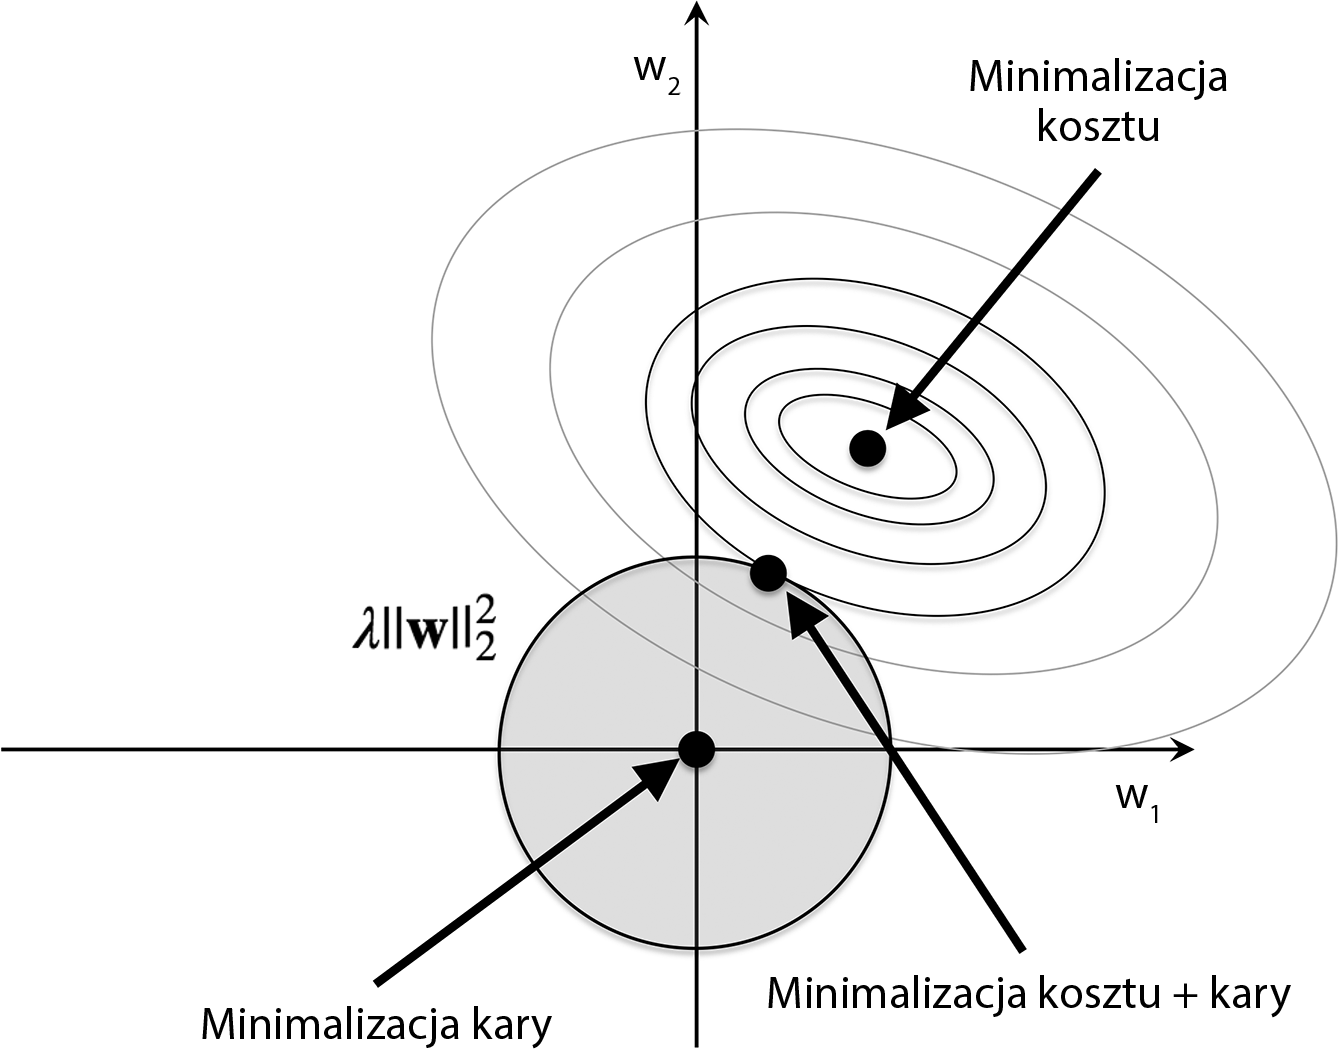

In [25]:
Image(filename='./rysunki/rozdzial 4/04_12.png',width=600)

L2: warunek regularyzacji wypełniony okrąg, wsp wag nie mogą przekroczyć budżetu regularyzacji, wybiera taki punkt, gdzie krawędz okręgu styka się z zarysem f. kosztu. Im większa $\lambda$ tym szybciej wzrasta obszar f. kosztu objęty karą (okrąg mniejszy). Podsumowując celem jest minimalizacja sumy nieobarczonej karą f. kosztu i warunku kary, czyli interpretując dodawanie obciążenia oraz dobór prostszego modelu z powodu niedostatku danych uczących.

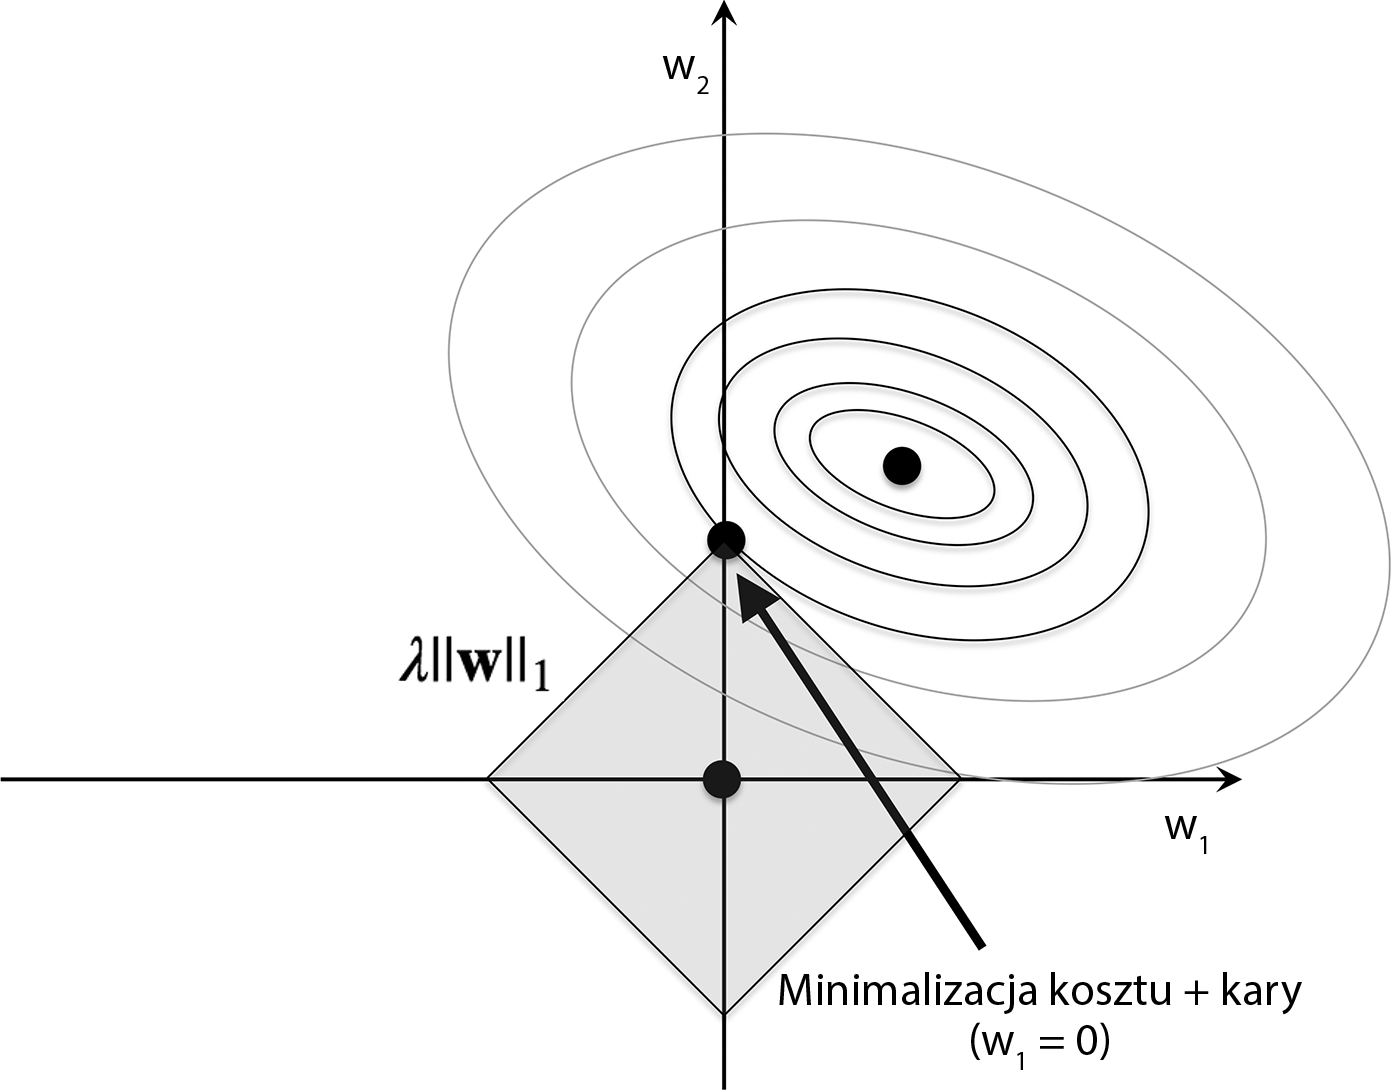

In [26]:
Image(filename='./rysunki/rozdzial 4/04_13.png',width=600)

Regularyzacja L1 i zjawisko rzadkości.Budżet ma charakter romboidalny, widzimy, że zarys f. kosztu styka się z krawędzią rombu L1 gdy w1=0. Bardzo prawdopodobne, że optimum znajdzie się na przecięciu z którąś z osi, co sprzyja rozrzedzeniu. Opis matematyczny-> podrozdział 3.4 książki _The Elements of Statistical Learning_ Trevor Hastie itd.

In [27]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std,y_train)
print('Dokładność dla danych uczących:',lr.score(X_train_std,y_train))
print('Dokładność dla danych testowych:',lr.score(X_test_std,y_test))

Dokładność dla danych uczących: 0.9838709677419355
Dokładność dla danych testowych: 0.9814814814814815


brak oznak przetrenowania modelu

In [28]:
lr.intercept_

array([-0.38375152, -0.15806293, -0.70040023])

informacja o dopasowaniu klas za pomocą techniki OvR(jeden przeciw reszcie). Pierwszy punkt przecięcia należy do modelu dopasowującego klasę 1 przeciw 2 i 3 itd

In [29]:
lr.coef_

array([[ 0.27987247,  0.        ,  0.        , -0.02784141,  0.        ,
         0.        ,  0.70990899,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23667643],
       [-0.64401876, -0.06877671, -0.05721064,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92670636,
         0.06019673,  0.        , -0.37111867],
       [ 0.        ,  0.06142416,  0.        ,  0.        ,  0.        ,
         0.        , -0.63659716,  0.        ,  0.        ,  0.49833928,
        -0.35813298, -0.57065046,  0.        ]])

3 wiersze współczynników, po 1 wektorze wag na każdą klasę (po 13 wag w wektorze, które zostały pomnożone przez cechy 13-wymiarowego zestawu danych Wine). $z=w^Tx+b$ <br> można zaobserwować, że większość wag ma nieznaczące wartości, są rozdrzdzone, w w yniku regularyzacji L1 wytrenowaliśmy model odporny na wpływ potencjalnie nieistotnych cech .

__Wykres scieżki regularyzacji__

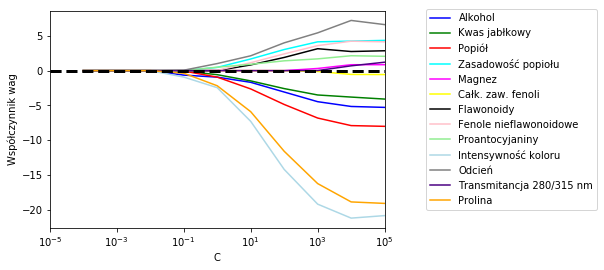

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
         'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4, 6):
    tmp=10**int(c)
    lr = LogisticRegression(penalty='l1', C=tmp, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(tmp)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column+1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Współczynnik wag')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

## Algorytm sekwencyjnego wyboru cech 

Dwa sposoby redukowania wymiarowości: 
1. wybór cech: podzbiory pierwotnych cech
2. odkrywanie cech: pozyskanie ze zbioru cech informacji pozwalających odkryć nową podprzestrzeń cech

Algorytm sekwencyjnego wyboru cech należy do rodziny zachłannych algorytmów poszukiwania (lokalnie optymalne wybory) wykorzystywanych do zmniejszenia cech z d do k wymiarowej przestrzeni (usuwanie nieistotnych cech/szumu). Przykład alg. Sekwencyjnej Selekcji Wstecznej SBS, który redukuje początkowy podzbiór przy minimalnym rozpadzie klasyfikatora.<br>
Alg. sekwencyjnie usuwa cechy z zapełnionego podzbioru cech aż do wprowadzenia odpowiedniej ich liczby do nowego podzbioru.Należy do tego zdefiniować funkcje kryterialną J. Może to być różnica w skuteczności klasyfikatora po pozbyciu się cechy, zdefiniować możemy funkcję usuwaną tak, żeby maksymalizowała wartość kryterialną tj. usuwamy tę cechę która jak najmniej obniża skuteczność klasyfikatora. <br> 4 proste etapy:

inicjacja algorytmy przy k=d<br>
określenie cechy $x^{\_}$ maksymalizującą f. kryterialną $x^{\_}= arg max J(X_k-x)$<br>
Usunięcie cechy $x^{\_}$ ze zbioru $x_{k-1}=X_k-x^{\_}; k:=k-1$<br>
zakończenie działania gdy równa się liczbie wymaganych cech, inaczej znowu do pkt 2

Więcej w artykule _Comparative Study of Techniques for LArge Scale Feature Selection_

Algorytm sekwencyjnego doboru cech SBS

In [31]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn.base import clone
from itertools import combinations
import numpy as np
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


class SBS():
    def __init__(self,
                 estimator,
                 k_features,
                 scoring=accuracy_score,
                 test_size=0.25,
                 random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        #wartość 13 bo mamy 13 cech
        self.indices_ = tuple(range(dim))
        #tworzy listę od 0 do 12
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test,
                                 self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [32]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn= KNeighborsClassifier(n_neighbors=2)
sbs=SBS(knn,k_features=1)
sbs.fit(X_train_std,y_train)

Dajemy do fit zbiór testowy, tam następuje ponowne rozdzielenie zbioru testowego na testowy i uczący (walidacyjny zbiór danych), pierwotny zestaw testowy nie zostaje dołączony do danych

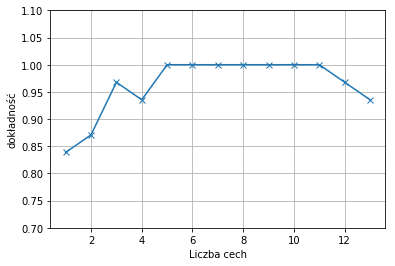

In [33]:
k_feat= [len(k) for k in sbs.subsets_]
plt.plot(k_feat,sbs.scores_,marker='x')
plt.ylim([0.7, 1.1])
plt.ylabel('dokładność')
plt.xlabel('Liczba cech')
plt.grid()
plt.show()

 Dokładność klasyfikatora poprawawiała się wraz ze zmniejszeniem cech, aż do granicznej wartości 5 (redukowanie klątwy wymiarowości)


In [34]:
k5=list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index(['Alkohol', 'Kwas jabłkowy', 'Zasadowość popiołu', 'Odcień', 'Prolina'], dtype='object')


wiemy które cechy gwarnatowały 100 procentową dokładność

sprawdzanie skuteczności klasyfikatora dla pierwotnego i zredukowanego zbioru danych

In [35]:
knn.fit(X_train_std, y_train)
print('Dokładność dla danych uczących:', knn.score(X_train_std, y_train))
print('Dokładność dla danych testowych:', knn.score(X_test_std, y_test))
knn.fit(X_train_std[:, k5], y_train)
print('Dokładność dla danych uczących:', knn.score(X_train_std[:, k5], y_train))
print('Dokładność dla danych testowych:', knn.score(X_test_std[:, k5], y_test))

Dokładność dla danych uczących: 0.9838709677419355
Dokładność dla danych testowych: 0.9444444444444444
Dokładność dla danych uczących: 0.9596774193548387
Dokładność dla danych testowych: 0.9629629629629629


Niewielkie przetrenowanie dla pierwotnego, poprawa skuteczności dla zminimalizowanego do 5 cech zbioru danych

<br>
doczytać http://scikit-learn.org/stable/modules/feature_selection.html

##  Ocenianie istotności za pomocą algorytmu losowego lasu

Za  pomocą losoweg lasu jesteśmy w stanie mierzyć  ważność cechy jako uśredniony spadek zanieczyszczeń obliczony dla wszystkich drzew decyzyjnych bez konieczności definiowania założeń, czy dane są liniowo rozdzielne czy nie. W scikit learn alg. losowego lasu gromadzi za nas informacje o ważności cechy za pomocą komendy _feature_importances_ mamy do niej dostęp.

In [45]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest= RandomForestClassifier(n_estimators=10000, random_state=0,n_jobs=1)
forest.fit(X_train,y_train)
importances= forest.feature_importances_
indices=np.argsort(importances)[::-1]
#[::-1] odwraca wektor, by był od największego do najmniejszego
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1,40, feat_labels[indices[f]],importances[indices[f]])) 


 1) Intensywność koloru                      0.182483
 2) Prolina                                  0.158610
 3) Flawonoidy                               0.150948
 4) Transmitancja 280/315 nm                 0.131987
 5) Alkohol                                  0.106589
 6) Odcień                                   0.078243
 7) Całk. zaw. fenoli                        0.060718
 8) Zasadowość popiołu                       0.032033
 9) Kwas jabłkowy                            0.025400
10) Proantocyjaniny                          0.022351
11) Magnez                                   0.022078
12) Fenole nieflawonoidowe                   0.014645
13) Popiół                                   0.013916


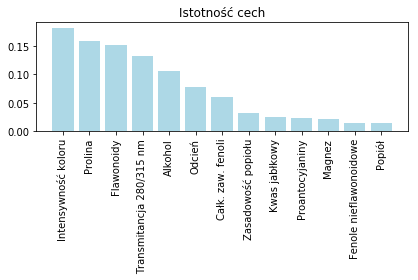

In [47]:
plt.title('Istotność cech')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')
plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

W alg. losowego lasu mamy potencjalny problem. Jeśli dwie cechy są ściśle powiązane, jedna z nich może być wysoko oceniona, podczas gdy informacje z drugiej mogą nie zostać uchwycone, co może być problematyczne przy interpretowaniu istotności cech (nie ma znaczenia przy skutczności predykcyjnej modelu)

Poniżej kod, który pozwala na dobór cech, które przekraczają dane wartości progowe po zakończeniu uczenia.

In [48]:
if Version(sklearn_version) < '0.18':
    X_selected = forest.transform(X_train, threshold=0.15)
else:
    from sklearn.feature_selection import SelectFromModel
    sfm = SelectFromModel(forest, threshold=0.15, prefit=True)
    X_selected = sfm.transform(X_train)

X_selected.shape

(124, 3)

In [49]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]],
                            importances[indices[f]]))

 1) Intensywność koloru            0.182483
 2) Prolina                        0.158610
 3) Flawonoidy                     0.150948
